# Instalación del Api de IB

In [1]:
from ibapi.client import EClient
from ibapi.wrapper import EWrapper
from ibapi.contract import Contract
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class MyWrapper(EWrapper):
    def __init__(self):
        self.datos_list = []
        self.datos = None
        
    def nextValidId(self, orderId:int):
        print("Comienza la petición con Id:", orderId)
        self.start()
    
    def historicalData(self, reqId, bar):
        # Por cada linea vamos sacando las variables y
        # añadiéndola a la lista
        self.datos_list.append(vars(bar));
        
    def historicalDataEnd(self, reqId: int, start: str, end: str):
        # Al finalizar ponemos los datos en formato dataframe,
        # la fecha en formato datetime y la ponemos como indice
        print("Final. ReqId:", reqId, "(", start, "/", end,")")
        self.datos = pd.DataFrame(self.datos_list)
        self.datos['date'] = pd.to_datetime(self.datos['date'])
        self.datos.set_index('date', inplace=True)
        app.disconnect()
        
    def error(self, reqId, errorCode, errorString):
        # Mostramos los mensajes que devuelve el IB Gateway
        print(errorString," (Id:", reqId, " Code:", errorCode,")")

    def start(self):        
        # Creamos en contrato
        contrato = Contract()
        contrato.symbol = "SPY"
        contrato.secType = "STK" 
        contrato.currency = "USD"
        contrato.exchange = "ARCA"
        
        # Hacemos la petición de los datos
        app.reqHistoricalData(1, contrato, "", "30 Y", "4 hours", "MIDPOINT", 0, 1, False, [])

In [3]:
wrap = MyWrapper()
app = EClient(wrap)
app.connect("127.0.0.1", 4002, clientId=1)
app.run()

Couldn't connect to TWS. Confirm that "Enable ActiveX and Socket EClients" 
is enabled and connection port is the same as "Socket Port" on the 
TWS "Edit->Global Configuration...->API->Settings" menu. Live Trading ports: 
TWS: 7496; IB Gateway: 4001. Simulated Trading ports for new installations 
of version 954.1 or newer:  TWS: 7497; IB Gateway: 4002  (Id: -1  Code: 502 )


In [4]:
wrap.datos

,open,high,low,close,volume,barCount,average
date,,,,,,,
2004-02-06 15:30:00,113.45,114.47,113.22,114.34,-1,-1,-1.0
2004-02-06 17:00:00,114.34,114.55,114.09,114.50,-1,-1,-1.0
2004-02-06 21:00:00,114.50,114.68,114.41,114.44,-1,-1,-1.0
2004-02-09 17:00:00,114.54,114.86,114.41,114.41,-1,-1,-1.0
2004-02-09 21:00:00,114.41,114.51,114.29,114.49,-1,-1,-1.0
...,...,...,...,...,...,...,...
2024-04-11 22:00:00,518.06,518.51,517.80,518.26,-1,-1,-1.0
2024-04-12 10:00:00,519.08,519.08,515.37,516.82,-1,-1,-1.0
2024-04-12 14:00:00,516.82,517.26,512.02,513.39,-1,-1,-1.0


<Axes: xlabel='date'>

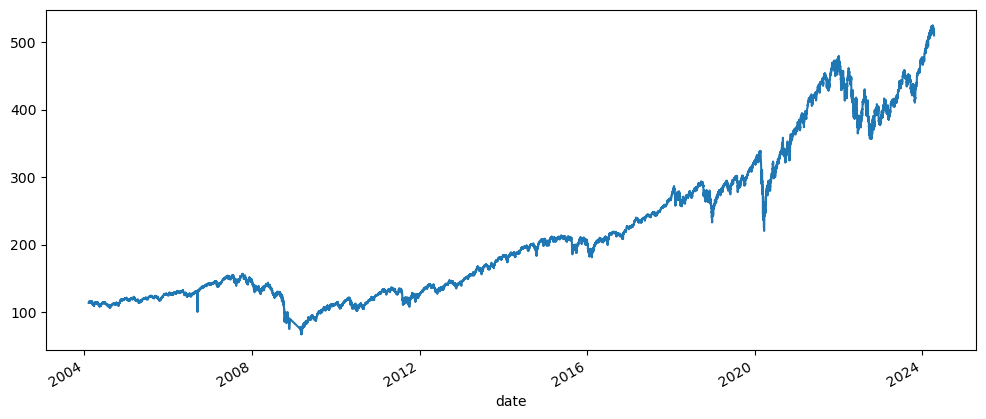

In [5]:
%matplotlib inline 
plt.figure(figsize=(12, 5))
wrap.datos.close.plot()

In [4]:
df = pd.DataFrame(wrap.datos)
df

""
